In [1]:
import jax
from jax import grad, vmap, jit
import jax.numpy as jnp

import matplotlib.pyplot as plt

## Jax

``jax`` är ett paket till python som erbjuder typ all funktionalitet som ``numpy`` gör, men också kan räkna ut derivator av alla funktioner som ``numpy`` har. Här är ett exempel på hur man räknar derivatan av ``x^2`` med ``jax``.

In [13]:
# Här är en funktion
funk = lambda x: x**2

# Här är dess derivata, man kan bara mata in en float
grad_funk = grad(funk)

# Här är dess derivata, fast man kan mata in en array
v_grad_funk = vmap(grad_funk)

Vi plottar resultatet:

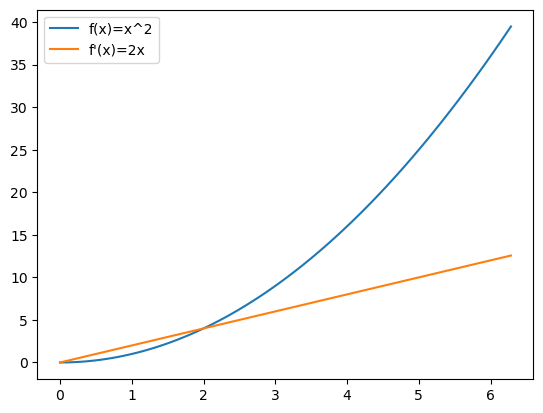

In [15]:

## Plotta funktionen och dess derivata
x = jnp.linspace(0, 2*jnp.pi, 100)
y = funk(x)
dydx = v_grad_funk(x)

plt.plot(x, y, label="f(x)=x^2")
plt.plot(x, dydx, label="f'(x)=2x")
plt.legend()

Jax är typ samma som numpy, men en stor skillnad är hur man använder ```vmap```. I jax brukar man definiera funktioner först med avseende på ett endimensionellt input, till exempel ``f = lambda x: x**2``, och sedan gör ``vmap(f)`` att man kan stoppa in vektorer iställert för tal som ``x``. Nu ska vi kolla kort på optimering med jax. Om vi vill hitta ett minimum till ``f`` kan vi göra gradientstegning:

In [20]:
dx = 0.01 # steglängd
x0 = 1. # startvärde
res = 1. # startvärde
while res > 1e-8:
    x1 = x0 - dx * grad_funk(x0)
    res = abs(x1-x0)
    x0 = x1
    
print(x1)

4.8169755e-07


Väldigt enkelt! Jax kan också hantera mycket svårare funktioner, till exempel om vi vill uppskatta omkretsen på en ellips:

In [25]:
def f(a, b):
    # a och b är längden på ellipsernas halvaxlar
    # Den här funktionen uppskattar ellipsens omkrets.
    theta = jnp.linspace(0, 2*jnp.pi, 1000)
    x = a*jnp.cos(theta)
    y = b*jnp.sin(theta)
    dx = jnp.diff(x)
    dy = jnp.diff(y)
    return jnp.sum(jnp.sqrt(dx**2 + dy**2))

grad_f = grad(f, argnums=(0, 1))
grad_f(1., 1.)

(Array(3.1415873, dtype=float32, weak_type=True),
 Array(3.1415877, dtype=float32, weak_type=True))

Säg att vi vill minimera omkrets för en given area, tex. ``ab=1``. Vi kan då göra en gradientstegning:

In [32]:
omkr = lambda a: f(a, 1./a)  # Eliminera b genom att substituera in b = 1/a.
grad_omkr = grad(omkr)

da = 0.01 # steglängd
a0 = 2. # startvärde
res = 1. # startvärde
while res > 1e-8:
    a1 = a0 - da* grad_omkr(a0)
    res = abs(a1-a0)
    a0 = a1
    
print(a1, 1./a1)

1.0000006 0.9999994


Mer information om JAX finns här: https://jax.readthedocs.io/en/latest/index.html